In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/kaggle/input/tsla-dataset/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
#shifting the columns by 1 (in order to be able to start at index 1)
series_shifted = df['Close'].shift()
df['Prev_Close'] = series_shifted
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000


In [8]:
df.shape

(3491, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3491 non-null   object 
 1   Open        3491 non-null   float64
 2   High        3491 non-null   float64
 3   Low         3491 non-null   float64
 4   Close       3491 non-null   float64
 5   Adj Close   3491 non-null   float64
 6   Volume      3491 non-null   int64  
 7   Prev_Close  3490 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 218.3+ KB


In [10]:
#checking for null entries
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Prev_Close    1
dtype: int64

In [11]:
#removing/dropping null row
df['Prev_Close'] = df['Prev_Close'].fillna(0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.000000
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000
...,...,...,...,...,...,...,...,...
3486,2024-05-06,183.800003,187.559998,182.199997,184.759995,184.759995,84390300,181.190002
3487,2024-05-07,182.399994,183.259995,177.399994,177.809998,177.809998,75045900,184.759995
3488,2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500,177.809998
3489,2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65701300,174.720001


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
# Convert dates to numerical values representing days since the first date
df['Numerical_Date'] = (df['Date'] - df['Date'].min()).dt.days

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3491 non-null   datetime64[ns]
 1   Open            3491 non-null   float64       
 2   High            3491 non-null   float64       
 3   Low             3491 non-null   float64       
 4   Close           3491 non-null   float64       
 5   Adj Close       3491 non-null   float64       
 6   Volume          3491 non-null   int64         
 7   Prev_Close      3491 non-null   float64       
 8   Numerical_Date  3491 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 245.6 KB


<Axes: >

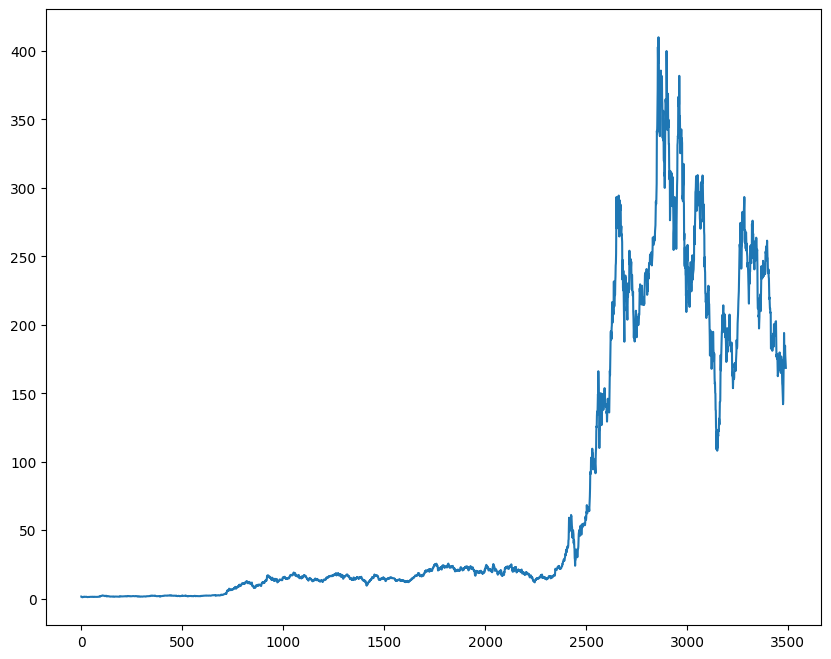

In [14]:
#plotting close prices (since 2010 to 2024)
df['Close'].plot(figsize=(10,8))

In [22]:
#X and Y
x = df.drop('Close', axis=1)
y = df['Close']

In [87]:
# Check DataFrame before adding new column
print("Before adding 'Days_Since_Reference':")
print(x.head())

# Calculate the number of days since a reference date
reference_date = x['Date'].min()
x['Days_Since_Reference'] = (x['Date'] - reference_date).dt.days

# Check DataFrame after adding new column
print("\nAfter adding 'Days_Since_Reference':")
print(x.head())


Before adding 'Days_Since_Reference':
        Date      Open      High       Low  Adj Close     Volume  Prev_Close  \
0 2010-06-29  1.266667  1.666667  1.169333   1.592667  281494500    0.000000   
1 2010-06-30  1.719333  2.028000  1.553333   1.588667  257806500    1.592667   
2 2010-07-01  1.666667  1.728000  1.351333   1.464000  123282000    1.588667   
3 2010-07-02  1.533333  1.540000  1.247333   1.280000   77097000    1.464000   
4 2010-07-06  1.333333  1.333333  1.055333   1.074000  103003500    1.280000   

   Numerical_Date  Days_Since_Reference  
0               0                     0  
1               1                     1  
2               2                     2  
3               3                     3  
4               7                     7  

After adding 'Days_Since_Reference':
        Date      Open      High       Low  Adj Close     Volume  Prev_Close  \
0 2010-06-29  1.266667  1.666667  1.169333   1.592667  281494500    0.000000   
1 2010-06-30  1.719333  2.02800

In [88]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4, random_state = 42)

In [89]:
print(x_train.shape, x_test.shape)

(2094, 9) (1397, 9)


In [90]:
# Assuming 'x_train' and 'x_test' are your training and test dataframes, respectively

# Drop the 'Date' column from both training and test data
x_train = x_train.drop(columns=['Date'])
x_test = x_test.drop(columns=['Date'])

# Now, 'x_train' and 'x_test' should contain only numeric features
# Initialize and fit the linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [91]:
 #plotting regressor () 0.96833798 = (0.03170807 * Prev_Close) + 0.05974673025482957
print(regressor.coef_)
print(regressor.intercept_)

[ 1.82936719e-13 -1.99353746e-13  2.34336160e-14  1.00000000e+00
 -5.08219768e-21 -2.09732558e-16 -1.53241892e-14  1.53387830e-14]
4.689582056016661e-13


In [92]:
#predicted value
predicted = regressor.predict(x_test)
print(x_test)

            Open        High         Low   Adj Close     Volume  Prev_Close  \
295     1.614667    1.656667    1.601333    1.647333   12051000    1.582000   
718     4.133333    4.158000    3.674667    3.700667  149865000    3.966667   
952    14.454667   14.500000   13.586000   13.612667  108172500   14.462000   
2560  153.007996  154.565994  145.768005  147.559998  301218000  149.250000   
2922  299.073334  312.166656  293.723328  307.773346   73625400  297.046661   
...          ...         ...         ...         ...        ...         ...   
2854  356.103333  360.333344  351.399994  359.013336   81639600  345.953339   
3258  224.220001  235.229996  223.009995  234.860001  164489700  224.570007   
664     2.490667    2.619333    2.487333    2.618667   40521000    2.469333   
1177   13.283333   13.501333   13.147333   13.496000   63330000   13.304000   
1244   17.026667   17.182667   16.942667   17.066668   39166500   17.086000   

      Numerical_Date  Days_Since_Reference  
295   

In [93]:
_df = pd.DataFrame({"Actual": y_test, "Predicted": predicted})
print(_df)

          Actual   Predicted
295     1.647333    1.647333
718     3.700667    3.700667
952    13.612667   13.612667
2560  147.559998  147.559998
2922  307.773346  307.773346
...          ...         ...
2854  359.013336  359.013336
3258  234.860001  234.860001
664     2.618667    2.618667
1177   13.496000   13.496000
1244   17.066668   17.066668

[1397 rows x 2 columns]


In [94]:
regressor.score(x_test, y_test)

1.0

In [95]:
import math 
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_absolute_error(y_test, predicted)))
rmse = metrics.mean_squared_error(y_test, predicted, squared=False)
print("R2 score ", metrics.r2_score(y_test, predicted))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error  4.4263376071097994e-13
Mean Square Error  4.602274109491782e-25
Root Mean Error  6.653072678927985e-07
R2 score  1.0
Root Mean Squared Error (RMSE): 6.784006271733379e-13


In [112]:
sorted_indices = np.argsort(y_test.index)

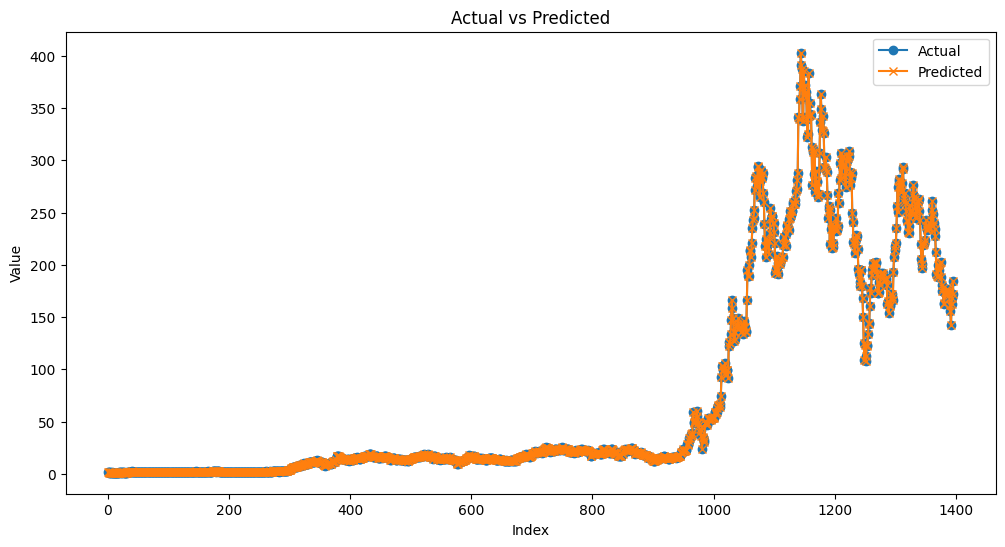

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.iloc[sorted_indices].values, label="Actual", marker='o')
plt.plot(predicted[sorted_indices],label="Predicted", marker='x')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


In [78]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

# Define a range of alpha values to test
alphas = [0.01, 0.1, 1, 10]

# Define a range of l1_ratio values to test
l1_ratios = [0.1, 0.5, 0.7, 0.9]

# Initialize the ElasticNetCV model with the range of alpha and l1_ratio values
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)

# Fit the model to the training data
elastic_net_cv.fit(x_train_scaled, y_train)

# Get the best alpha and l1_ratio values
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

# Print the best hyperparameters
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

# Evaluate the model with the best hyperparameters using cross-validation
cv_scores = cross_val_score(elastic_net_cv, x_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.402e+03, tolerance: 2.197e+03
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.855e+03, tolerance: 1.807e+03
  model = cd_fast.enet_coordinate_descent(


Best alpha: 0.01
Best l1_ratio: 0.9


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.754e+03, tolerance: 1.775e+03
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.632e+03, tolerance: 1.730e+03
  model = cd_fast.enet_coordinate_descent(


Cross-Validation Scores: [0.99982608 0.99979242 0.99982207 0.99983076 0.99975036]
Mean CV Score: 0.9998043382796885


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.776e+03, tolerance: 1.724e+03
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.570e+03, tolerance: 1.751e+03
  model = cd_fast.enet_coordinate_descent(


In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Values to try for alpha
    'l1_ratio': [0.1, 0.5, 0.9]  # Values to try for l1_ratio
}

# Initialize the Elastic Net model
elastic_net = ElasticNet()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_test = best_model.predict(x_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test):", mse_test)


Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Mean Squared Error (Test): 5.370663686792858


In [130]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming x_train, y_train, x_test, y_test are already defined

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Split the data into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_scaled, y_train, test_size=0.4, random_state=42
)

# Initialize and fit the Elastic Net model
elastic_net = ElasticNet(alpha=6, l1_ratio=0.9)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(x_train_split, y_train_split)

# Evaluate the model
y_pred = elastic_net.predict(x_val_split)
mse = mean_squared_error(y_val_split, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 250.7991402591713


In [131]:
import math 
print("Mean Absolute Error ", metrics.mean_absolute_error(y_val_split, y_pred))
print("Mean Square Error ", metrics.mean_squared_error(y_val_split, y_pred))
print("Root Mean Error ", math.sqrt(metrics.mean_absolute_error(y_val_split, y_pred)))
rmse = metrics.mean_squared_error(y_val_split, y_pred, squared=False)
print("R2 score ", metrics.r2_score(y_val_split, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error  12.248760738968933
Mean Square Error  250.7991402591713
Root Mean Error  3.499822958232164
R2 score  0.9756491692602597
Root Mean Squared Error (RMSE): 15.836639171843606


In [132]:
_df = pd.DataFrame({"Actual": y_val_split, "Predicted": y_pred})
print(_df)

          Actual   Predicted
2565  139.440002  129.422174
1838   23.373333   34.961184
2106   23.210667   36.898487
514     2.180000    6.542502
2832  259.186676  231.233457
...          ...         ...
83      1.424000    2.216983
2681  232.946671  203.019114
1948   20.278667   33.300868
2975  335.016663  292.433038
1627   13.210000   24.869283

[838 rows x 2 columns]


In [133]:
sorted_indices = np.argsort(y_val_split.index)

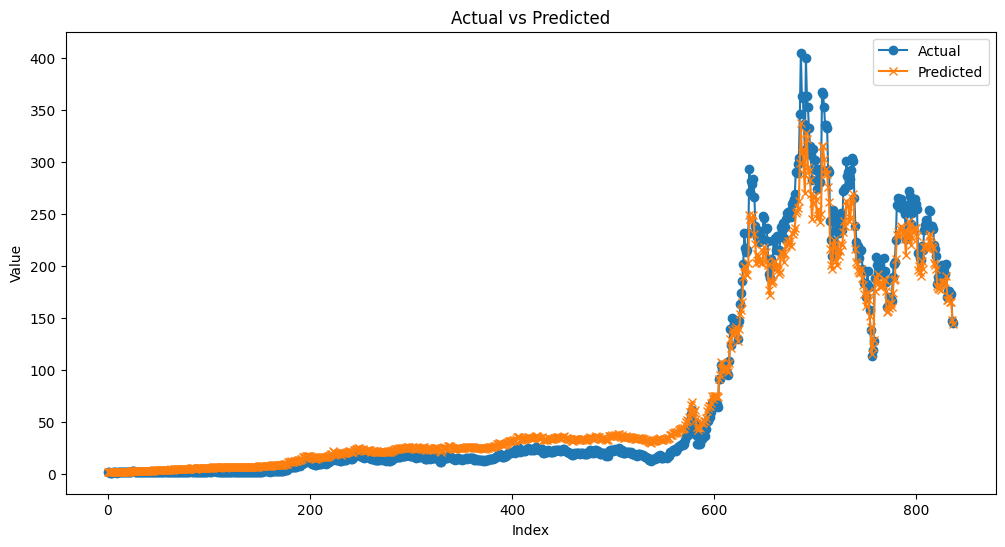

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(y_val_split.iloc[sorted_indices].values, label="Actual", marker='o')
plt.plot(y_pred[sorted_indices],label="Predicted", marker='x')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()
